<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [43]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [0]:
# extract values, not entire Df
score = data[['DMV_Test_1','DMV_Test_2']].values
result = data[['Results']].values

### Task 3: Visualize the Data
---

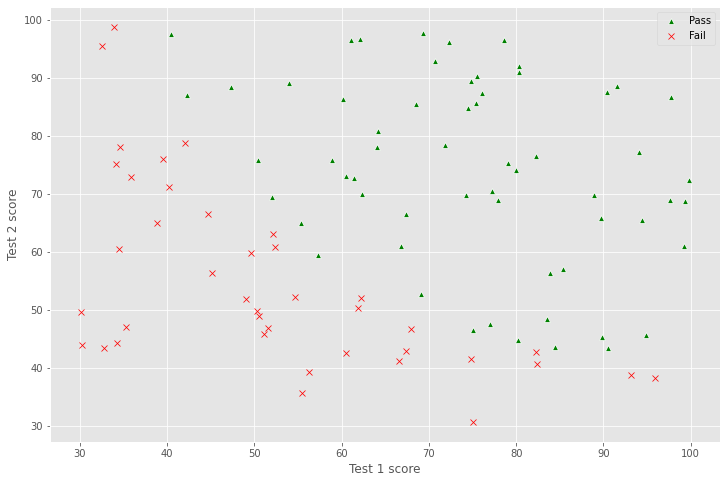

In [46]:
passed = (result==1)
failed = (result==0)

ax = sns.scatterplot(x=score[passed[:,0],0],
                     y=score[passed[:,0],1],
                     marker='^',
                     color='green',
                     label='Pass')
ax = sns.scatterplot(x=score[failed[:,0],0],
                     y=score[failed[:,0],1],
                     marker='x',
                     color='red',
                     label='Fail')
ax.set(xlabel='Test 1 score', ylabel='Test 2 score')
ax.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [0]:
def cost(theta, x, y):
  m = len(y)
  y_pred = sigmoid(np.dot(x, theta))
  error = (y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  cost = -1/m*sum(error)
  gradient = 1/m*sum(np.dot(x.transpose(),(y_pred-y)))
  return cost, gradient

### Task 6: Cost and Gradient at Initialization
---

In [49]:
mean_score = np.mean(score, axis=0)
std_score = np.std(score, axis=0)
scores = (score-mean_score)/std_score

rows, cols = scores.shape[0], scores.shape[1]

x = np.append(np.ones((rows,1)), scores, axis=1)
y = result.reshape(rows,1)

theta_init = np.zeros((cols+1, 1))
c, gradient = cost(theta_init, x, y)
print(c, gradient)

[0.69314718] [-0.63221528]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [0]:
def gradient_descent(x, y, theta, learning_rate, no_of_iter):
  costs = []
  for _ in range(no_of_iter):
    c, gradient = cost(theta, x, y)
    theta -= learning_rate*gradient
    costs.append(c)
  return theta, costs

In [53]:
theta, costs = gradient_descent(x,y,theta_init,0.01, 150)
print(theta, costs[-1])

[[1.09477744]
 [1.09477744]
 [1.09477744]] [0.34888532]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Cost vs Iter')

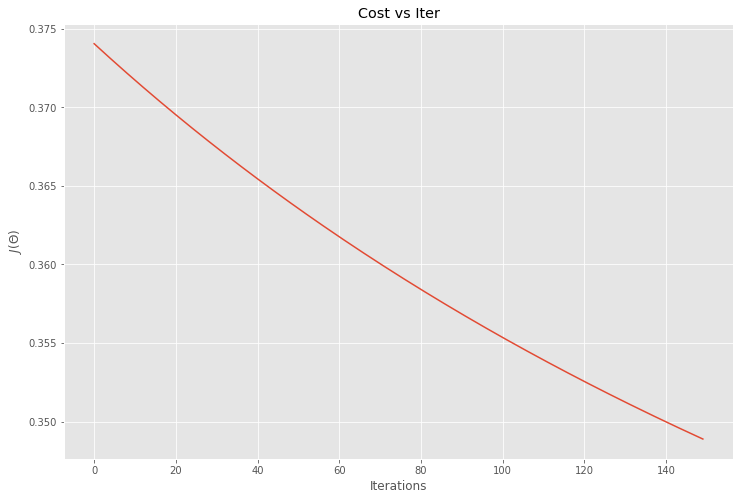

In [58]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")  #Latex
plt.title("Cost vs Iter")